# Exploration of Dependent Linear Discriminant Analysis

## First, Let's Generate Random data

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random as rand


size_of_each_class = 100
distributions = [[0,10],
                [50, 30],
                [100, 40]]
distribution_variance = [[47, 79],
                        [56,10],
                        [89,5]]
num_classes = len(distributions)
data = []
targets = []
dimensions = 2
i = 0
#For each distribution, generate guassian data and add to our data
for mu, sigma in distributions:
    
    #Generate size_of_each_class number of normal distibution datapoints
    full_dimension = []
    for j in range(dimensions):
        rand_variance =  distribution_variance[rand.randint(0,2)] #this makes each distrubiton a little varied
        mu2 = mu +rand_variance[0]
        sigma2 = sigma + rand_variance[1]
        gaussian_data = np.random.normal(mu2, sigma2, size_of_each_class)
        full_dimension.append(gaussian_data)
    full_dimension = np.asarray(full_dimension)
    if(len(data) != 0) :
        data = np.append(data, np.transpose(full_dimension), axis = 0)
    else :
        data = np.transpose(full_dimension)
    
    #Generate a target same size as each class size        
    gen_targets = i * np.ones((1,size_of_each_class))        
    targets.append(gen_targets)
    i += 1

targets = np.asarray(targets).flatten()

print('Shape of data is : ', data.shape)
print('Shape of targets : ', targets.shape)

Shape of data is :  (300, 2)
Shape of targets :  (300,)


## Visualize the data

IndexError: index 2 is out of bounds for axis 0 with size 2

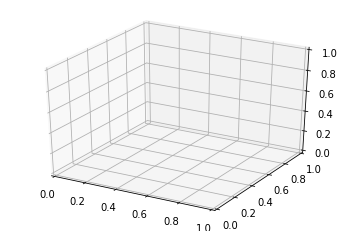

In [2]:
graph_data = data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
for i in range(len(graph_data)):
    ax.scatter(graph_data[i][0], graph_data[i][1], graph_data[i][2], c = colors[int(targets[i])])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

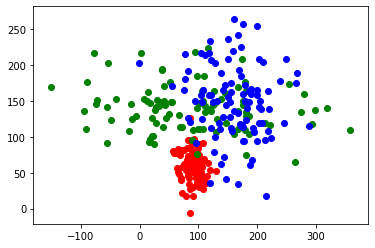

In [13]:

colors = ['r', 'g', 'b']
for i in range(len(graph_data)):
    plt.scatter(graph_data[i][0], graph_data[i][1], c = colors[int(targets[i])])
plt.show()

## LDA

### 1. Create Sb Matrix

In [15]:
#First we calculate Total U
U = data[0] - data[0]
for point in data:
    U += point
U /= len(data)

#Then we separate the classes
data_sep_class = []
for i in range(dimensions):
    data_sep_class.append([])
# print(data_sep_class)
j = 0
for i in range(len(data)):
    for j in range(num_classes):
        if(j == targets[i]):
            data_sep_class[j].append(data[i])
            break

Ui = []
#Then we calculate the Ui for each class
for class_dist in data_sep_class:
#     mu_i = np.zeros(np.asarray(class_dist).shape[0])
    mu_i = class_dist[0]-class_dist[0]
    for point in class_dist:
        mu_i += point
    mu_i /= len(class_dist)
    Ui.append(mu_i)
# print(Ui)

data_sep_class = np.asarray(data_sep_class)
diff_matrix = np.zeros((dimensions, dimensions))
#Now we find the difference matrices
for mu_i in Ui:
    diff = mu_i - U
    diff_matrix += np.matmul(diff,diff.T)
Sb = diff_matrix
print("Shape of Sb matrix: ", Sb.shape)
    


IndexError: list index out of range


### 2. Create Sw matrix

In [7]:
# For each class, find the diff matrix for that class
diff_matrices = []
for i in range(len(data_sep_class)):
    class_dist = data_sep_class[i]
    mu_i = Ui[i]
    diff = class_dist - mu_i
    diff_matrix = np.matmul(diff.T, diff)
    diff_matrices.append(diff_matrix)
Sw = diff_matrices
print("Shape of Sw matrix: ", np.asarray(Sw).shape)

Shape of Sw matrix:  (3, 3, 3)


### 3. Min-max within and between class variance

In [11]:
k = 1
Vs = []
#Find Wi's
for sw in Sw:
    W = np.matmul(np.linalg.inv(sw), Sb)

    #Get eigenvalues and eigenvectors of W
    w,v = np.linalg.eig(W)
    # take top k eigenenvectors
    print(v.shape)
    vk = v[0:,0:k]
    Vs.append(vk)
print("Shape of lower projections ", np.asarray(Vs).shape)


(3, 3)
(3, 3)
(3, 3)
Shape of lower projections  (3, 3, 1)


#### We now have a lower dimensional space that maximizes separation of the data

In [12]:
#Project our current data onto this axis
projected = []
for i in range(len(Vs)):
    datahere = data_sep_class[i]
    Vi = Vs[i]
    datahere = np.matmul(datahere, Vi)
    projected.append(datahere)
print("Shape of new projected data split by class", np.asarray(projected).shape)

Shape of new projected data split by class (3, 100, 1)


## We can now visualize the new lower dimensional projection

In [9]:
for i in range(len(projected)):
#     for point in projected[i]:
#         plt.scatter(point[0], point[1], color=colors[i])
        plt.scatter(projected[i], np.ones((1,len(projected[i]))),  color=colors[i])

NameError: name 'projected' is not defined